In [7]:
import pygrib

def view_grib_file(file_path):
    grbs = pygrib.open(file_path)
    for grb in grbs:
        grb_values = grb.values
        print(grb)
        print(len(grb_values))
    grbs.close()

# Specify the file paths of your GRIB files
zero_hour_file = "zero-hour"
twelve_hour_file = "twelve-hour"

# View the first few lines of data from each file
print("Zero-hour GRIB file:")
view_grib_file(zero_hour_file)

print("\nTwelve-hour GRIB file:")
view_grib_file(twelve_hour_file)


Zero-hour GRIB file:
1:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 500:fcst time 0 hrs:from 201302130000
361

Twelve-hour GRIB file:
1:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 500:fcst time 12 hrs:from 201302130000
361


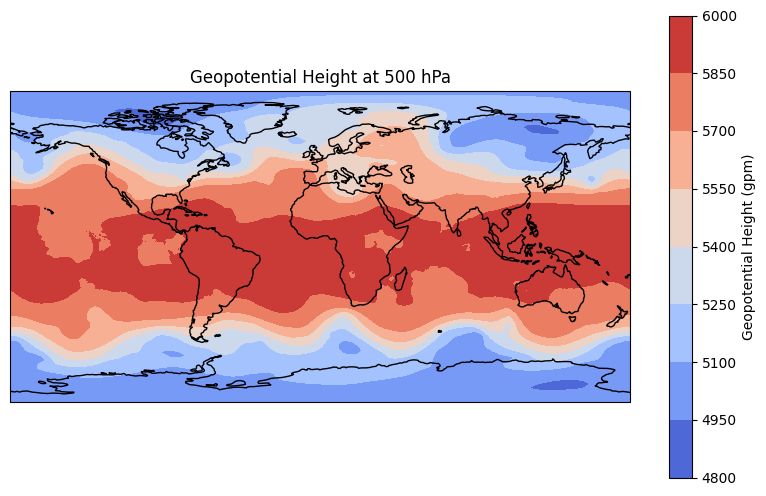

In [20]:
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_geopotential_height(file_path):
    grbs = pygrib.open(file_path)
    grb = grbs.select(name='Geopotential Height')[0]  # Assuming Geopotential Height is the variable of interest

    data = grb.values
    lats, lons = grb.latlons()

    # Create a map plot using Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the geopotential height data
    plt.contourf(lons, lats, data, cmap='coolwarm')

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label('Geopotential Height (gpm)')

    # Set plot title and labels
    plt.title('Geopotential Height at 500 hPa')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()

# Specify the file path of your GRIB file
grib_file = "new-zero"

# Plot geopotential height on a map
plot_geopotential_height(grib_file)


In [14]:
import pygrib

# Open a GRIB file
with pygrib.open('twelve-hour') as grbs:
    # Iterate over all messages in the file
    for grb in grbs:
        # Print the name of the current message
        print(grb)



1:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 500:fcst time 12 hrs:from 201302130000


In [18]:
import pygrib
import numpy as np

# Open a GRIB file
with pygrib.open('zero-hour') as grbs:
    # Select the first message
    grb = grbs.select()[0]

    # Get the values from the message
    data = grb.values

    # Print the shape and the first few values of the data
    print('Shape:', data.shape)
    print('First few values:', data.ravel()[:5])

    # Get the longitude/latitude coordinates
    lats, lons = grb.latlons()

    # Print the shape and the first few latitudes and longitudes
    print('Shape:', lats.shape, lons.shape)
    print('First few latitudes:', lats.ravel()[:5])
    print('First few longitudes:', lons.ravel()[:5])


Shape: (361, 720)
First few values: [4972.678 4972.678 4972.678 4972.678 4972.678]
Shape: (361, 720) (361, 720)
First few latitudes: [-90. -90. -90. -90. -90.]
First few longitudes: [0.  0.5 1.  1.5 2. ]


In [17]:
import pygrib

# Open a GRIB file
with pygrib.open('zero-hour') as grbs:
    # Iterate over all messages in the file
    for grb in grbs:
        # Get the values from the message
        data = grb.values
        lats, lons = grb.latlons()

        print('Message:', grb)
        print('Shape:', data.shape)
        print('First few data values:', data.ravel()[:5])
        print('First few latitudes:', lats.ravel()[:5])
        print('First few longitudes:', lons.ravel()[:5])
        print('\n')


Message: 1:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 500:fcst time 0 hrs:from 201302130000
Shape: (361, 720)
First few data values: [4972.678 4972.678 4972.678 4972.678 4972.678]
First few latitudes: [-90. -90. -90. -90. -90.]
First few longitudes: [0.  0.5 1.  1.5 2. ]




In [19]:
import pygrib
import numpy as np

# Open a GRIB file
with pygrib.open('twelve-hour') as grbs:
    # Select the first message
    grb = grbs.select()[0]

    # Get the values from the message
    data = grb.values

    # Get the longitude/latitude coordinates
    lats, lons = grb.latlons()

    # Find the index of the desired latitude and longitude
    lat_idx = np.where(lats == -90)[0]
    lon_idx = np.where(lons == 0.5)[0]

    # Get the intersection of the two indices
    idx = np.intersect1d(lat_idx, lon_idx)

    # Print the Geopotential Height at the desired latitude and longitude
    print('Geopotential Height at lat -90 and lon 0.5:', data.ravel()[idx])


Geopotential Height at lat -90 and lon 0.5: [4980.421]
